In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
file_path = 'Novanectar.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [ ]:
# Display missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Fill missing values with mean for numerical columns and mode for categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

Missing values before handling:
Date               GameID         Drive        qtr       down       time           TimeUnder        TimeSecs          PlayTimeDiff      SideofField   yrdln        yrdline100        ydstogo        ydsnet        GoalToGo       FirstDown       posteam   DefensiveTeam desc              PlayAttempted       Yards.Gained       sp                 Touchdown     ExPointResult    TwoPointConv    DefTwoPoint      Safety             Onsidekick      PuntResult        PlayType          Passer          Passer_ID     PassAttempt     PassOutcome     PassLength   AirYards        YardsAfterCatch QBHit     PassLocation   InterceptionThrown    0
dtype: int64


In [ ]:
# Using Z-score to detect outliers
from scipy.stats import zscore

z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
data_cleaned = data[~outliers]

In [ ]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
data_cleaned.drop_duplicates(inplace=True)

In [ ]:
if 'Date' in data.columns:
    data_cleaned['Year'] = pd.to_datetime(data_cleaned['Date']).dt.year
    data_cleaned['Month'] = pd.to_datetime(data_cleaned['Date']).dt.month
    data_cleaned['Day'] = pd.to_datetime(data_cleaned['Date']).dt.day

In [ ]:
# Normalization
scaler = MinMaxScaler()
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

ValueError: at least one array or dtype is required

In [ ]:
data_cleaned.hist(bins=50, figsize=(20, 15))
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [ ]:
print("Missing values after handling:")
print(data_cleaned.isnull().sum())
print("Duplicates after handling:", data_cleaned.duplicated().sum())

Missing values after handling:
Date               GameID         Drive        qtr       down       time           TimeUnder        TimeSecs          PlayTimeDiff      SideofField   yrdln        yrdline100        ydstogo        ydsnet        GoalToGo       FirstDown       posteam   DefensiveTeam desc              PlayAttempted       Yards.Gained       sp                 Touchdown     ExPointResult    TwoPointConv    DefTwoPoint      Safety             Onsidekick      PuntResult        PlayType          Passer          Passer_ID     PassAttempt     PassOutcome     PassLength   AirYards        YardsAfterCatch QBHit     PassLocation   InterceptionThrown    0
dtype: int64
Duplicates after handling: 0


In [ ]:
# Create a log file to document steps
with open("data_cleaning_log.txt", "w") as log_file:
    log_file.write("Data Cleaning and Processing Log\n")
    log_file.write("Missing values before handling:\n")
    log_file.write(str(data.isnull().sum()) + "\n")
    log_file.write("Missing values after handling:\n")
    log_file.write(str(data_cleaned.isnull().sum()) + "\n")
    log_file.write("Duplicates after handling: " + str(data_cleaned.duplicated().sum()) + "\n")

# Save the cleaned dataset
data_cleaned.to_csv('Novanectar_cleaned.csv', index=False)
print("Data cleaning and processing complete. Cleaned data saved to 'Novanectar_cleaned.csv'.")

Data cleaning and processing complete. Cleaned data saved to 'Novanectar_cleaned.csv'.


<ipython-input-14-675061a53b98>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


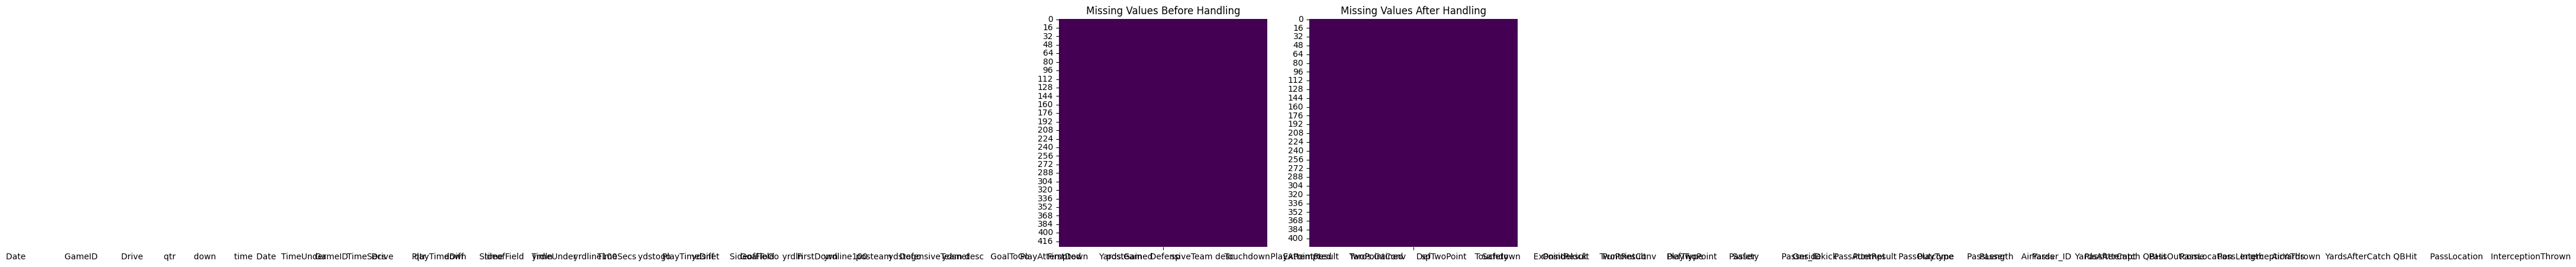

In [ ]:
# Load the original and cleaned datasets
original_data = pd.read_csv('Novanectar.csv')
cleaned_data = pd.read_csv('Novanectar_cleaned.csv')

# 1. Visualize Missing Values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(original_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Handling')

plt.subplot(1, 2, 2)
sns.heatmap(cleaned_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Handling')

plt.tight_layout()
plt.show()

In [ ]:
# Using box plots to visualize outliers
numeric_columns = original_data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i + 1)
    sns.boxplot(data=original_data[column])
    plt.title(f'Outliers in {column} Before Removal')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i + 1)
    sns.boxplot(data=cleaned_data[column])
    plt.title(f'Outliers in {column} After Removal')

plt.tight_layout()
plt.show()

# 3. Histograms of Numerical Columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i + 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Distribution of {column} After Cleaning')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>